# Question 7

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 

In [2]:
#Importing Insurance dataset

df = pd.read_csv('C:/Users/skaguda/Downloads/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis.

This will be done to check the following on the data: shape, data types, missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


##### There are no null values in any of the columns.

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### The data looks credible as all the statistics seem reasonable
Looking at the age column, the data looks representative of the true age distribution of the adult population.
Very few people have more than 2 children. 75% of the people have 2 or less children
The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

<AxesSubplot:xlabel='age'>

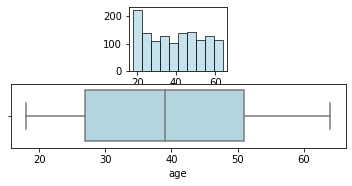

In [10]:
#Visualization of the Age column

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

#### Age appears to be distributed quiet uniformly.
#### The average age for the dataset is 38 years, whilst the minimum and maximum avearge of the data set is 27 years and 51 years respectively.

In [11]:
#Isolating continuous and discrete variables

numerical_continous = df.select_dtypes("number")
numerical_discrete = df.select_dtypes("object")

In [12]:
numerical_continous.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [13]:
numerical_discrete.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


(array([[1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 457.,  433.,  157.,   94.,   42.,   54.,   62.,   32.,    3.,
            4.]]),
 array([    0.      ,  6377.042801, 12754.085602, 19131.128403,
        25508.171204, 31885.214005, 38262.256806, 44639.299607,
        51016.342408, 57393.385209, 63770.42801 ]),
 <a list of 4 BarContainer objects>)

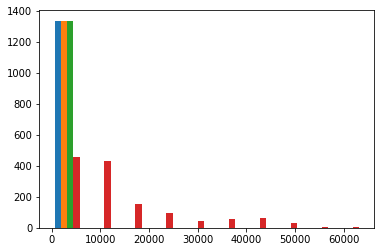

In [14]:
#Finding outliers in the numerical_contionus variables and resolving with zscore test

plt.hist(numerical_continous)

In [15]:
#Calculating mean, standard deviation

mean = np.mean(numerical_continous)
std = np.std(numerical_continous)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64
std. deviation is age            14.044709
bmi             6.095908
children        1.205042
charges     12105.484976
dtype: float64


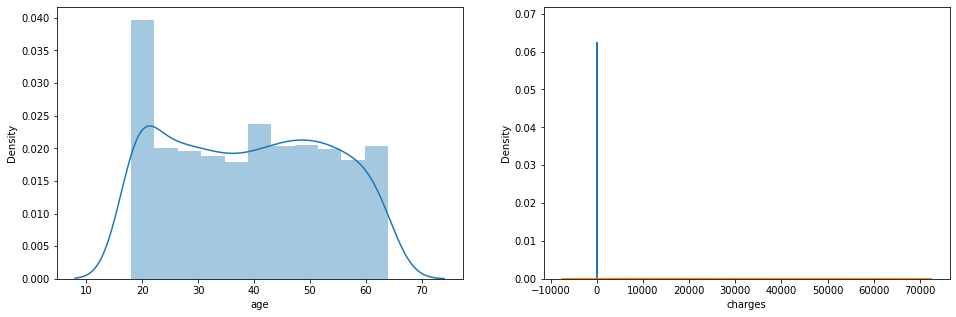

In [16]:
#Plotting the distribution for the features

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.subplot(1,2,2)
sns.distplot(df['bmi'])
sns.distplot(df['charges'])
plt.subplot(1,2,2)
plt.show()

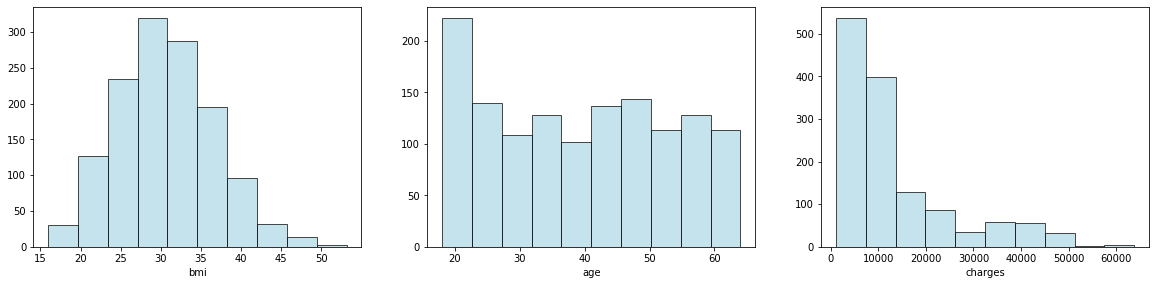

In [17]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

In [18]:
#Finding the boundary values (Age)

print("max_value",df['age'].mean() + 3*df['age'].std())
print("min_value",df['age'].mean() - 3*df['age'].std())

max_value 81.3569065487098
min_value -2.9428557265872257


In [19]:
#Trimming of Outliers

new_df = df[(df['age'] > -2.94) | (df['age'] < 81.35)]
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
upper_limit = df['age'].mean() + 3*df['age'].std()
lower_limit = df['age'].mean() - 3*df['age'].std()

In [21]:
df['age'] = np.where(
    df['age']>upper_limit,
    upper_limit,
    np.where(
        df['age']<lower_limit,
        lower_limit,
        df['age']
    )
)

In [22]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Now removing outliers in Charges.


In [23]:
#Finding the boundary values (Charges)

print("max_value",df['charges'].mean() + 3*df['charges'].std())
print("min_value",df['charges'].mean() - 3*df['charges'].std())

max_value 49600.45597522324
min_value -23059.611444940725


In [24]:
#Trimming of Outliers

new_df_charges = df[(df['charges'] > -23059.61) | (df['charges'] < 49600.45)]
new_df_charges

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [25]:
upper_limit = df['charges'].mean() + 3*df['charges'].std()
lower_limit = df['charges'].mean() - 3*df['charges'].std()

In [26]:
df['charges'] = np.where(
    df['charges']>upper_limit,
    upper_limit,
    np.where(
        df['charges']<lower_limit,
        lower_limit,
        df['charges']
    )
)

In [27]:
df['charges'].describe()

count     1338.000000
mean     13228.065484
std      11963.330652
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      49600.455975
Name: charges, dtype: float64

In [28]:
new_df_cap = df.copy()
new_df_cap['age'] = np.where(
    new_df_cap['age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['age'] < lower_limit,
        lower_limit,
        new_df_cap['age']
    )
)

In [29]:
new_df_cap2 = df.copy()
new_df_cap2['charges'] = np.where(
    new_df_cap2['charges'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap2['charges'] < lower_limit,
        lower_limit,
        new_df_cap2['charges']
    )
)

## Comparing plots for Age and Charges after capping 

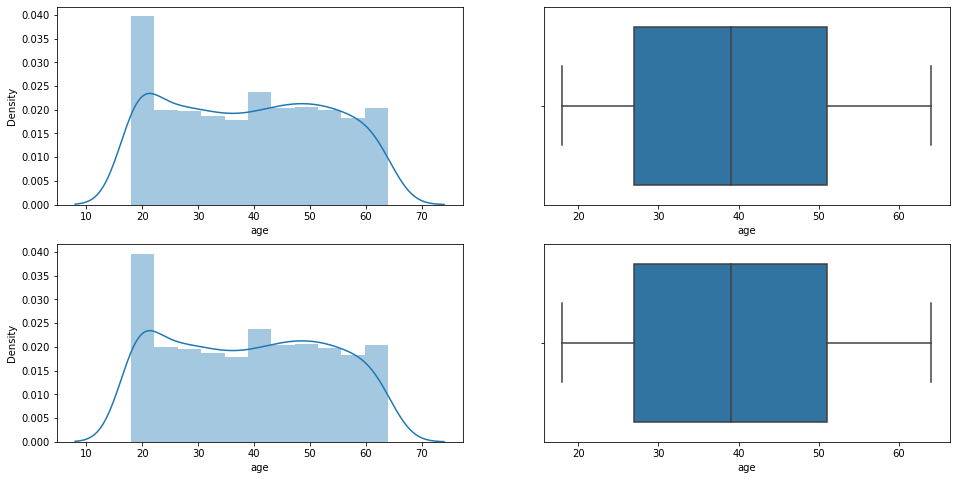

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['age'])
plt.subplot(2,2,2)
sns.boxplot(df['age'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['age'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['age'])
plt.show()

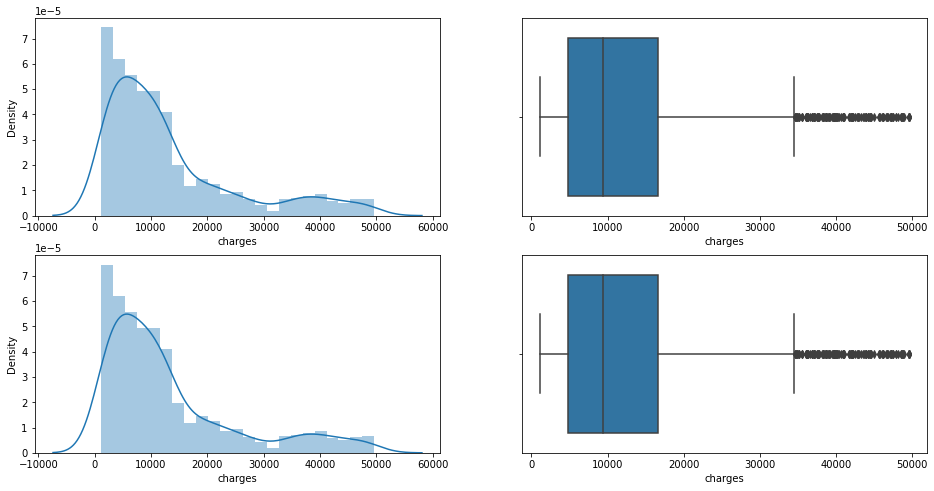

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['charges'])
plt.subplot(2,2,2)
sns.boxplot(df['charges'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap2['charges'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap2['charges'])
plt.show()

In [32]:
#Isolating all categorical columns into a list

categorical = ['sex','smoker','region']

In [33]:
#Identifying outliers using Combined Rare Levels Method. We first need to convert categorical values into numeric values using get_dummies of pandas.

df = pd.get_dummies(df,drop_first=True)   
# here drop_first = True will remove first sub-feature from each feature, because we can derive deleted sub-feature from other sub-features
df.head()



,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,0,1,0,0,1
1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0


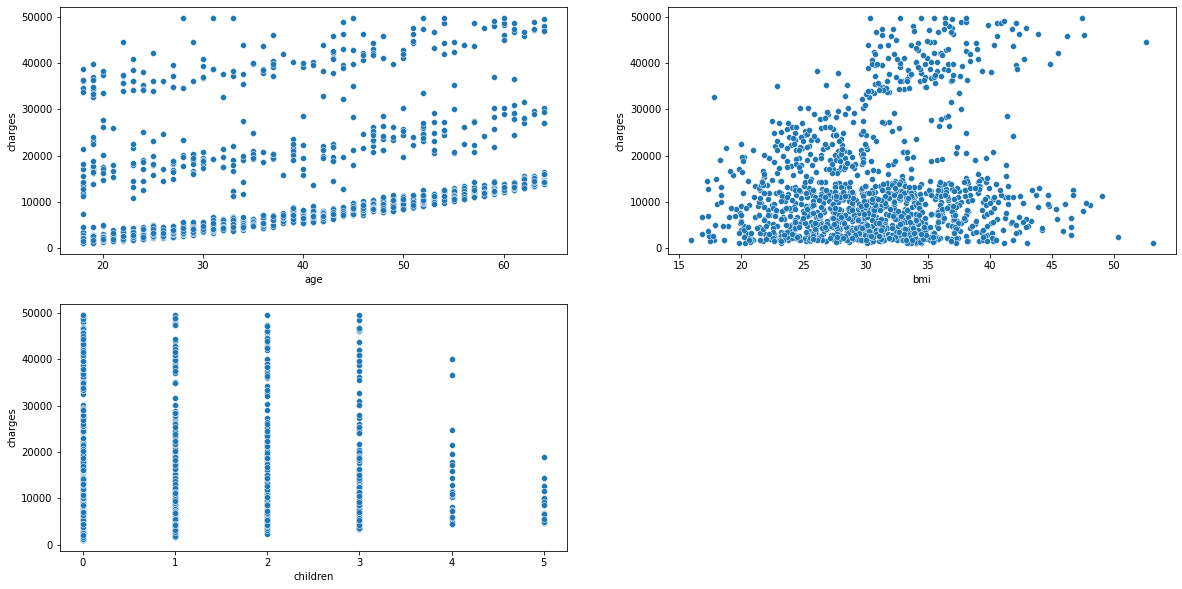

In [34]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['age','bmi','children']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feat],y=df.charges)
plt.show()

In [35]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,0,1,0,0,1
1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3,10600.54830,1,0,1,0,0
1334,18.0,31.920,0,2205.98080,0,0,0,0,0
1335,18.0,36.850,0,1629.83350,0,0,0,1,0
1336,21.0,25.800,0,2007.94500,0,0,0,0,1


In [36]:
# Arranging dependent and independent variables for Modeling
X = df.drop('charges',axis=1)
y = df.charges

In [37]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,0,1,0,0,1
1,18.0,33.770,1,1,0,0,1,0
2,28.0,33.000,3,1,0,0,1,0
3,33.0,22.705,0,1,0,1,0,0
4,32.0,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3,1,0,1,0,0
1334,18.0,31.920,0,0,0,0,0,0
1335,18.0,36.850,0,0,0,0,1,0
1336,21.0,25.800,0,0,0,0,0,1


In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [39]:
from sklearn.linear_model import Ridge

In [40]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

Ridge()

In [42]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [43]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 255.623 * X0 + 331.382 * X1 + 487.499 * X2 + -106.567 * X3 + 23529.884 * X4 + -375.937 * X5 + -1026.327 * X6 + -935.163 * X7


### The best features are age, gender, and smoker features

# Question 8

In [44]:
# Changing target values to log values helps to select the right features as it normalises/standardizes them and then ranks them.

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=7, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

In [45]:
selector.support_

array([ True,  True, False,  True,  True, False,  True])

In [46]:
selector.ranking_

array([1, 1, 2, 1, 1, 3, 1])

### Age, BMI and charges are the best features of the data

In [47]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split

xtrain,xtest,Ytrain,Ytest = train_test_split(X,y,test_size=1/4,random_state=1)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error

#Linear Regression

from sklearn.linear_model import LinearRegression

le = LinearRegression()
le_model = le.fit(xtrain,Ytrain)
# predicting values for test data
le_Ypredict = le_model.predict(xtest)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(Ytest,le_Ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(Ytest,le_Ypredict),2)))

MSE of Linear Regression : 5.39
r2 score of Linear Regression : 0.74


In [49]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_model = dt.fit(xtrain,Ytrain)
# predicting values for test data
dt_Ypredict = dt_model.predict(xtest)
print('MSE of DecisionTreeRegressor : ' + str(round(mean_squared_error(Ytest,dt_Ypredict),2)))
print('r2 score of DecisionTreeRegressor : ' + str(round(r2_score(Ytest,dt_Ypredict),2)))

MSE of DecisionTreeRegressor : 15.08
r2 score of DecisionTreeRegressor : 0.28


In [50]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn_model = kn.fit(xtrain,Ytrain)
# predicting values for test data
kn_Ypredict = kn_model.predict(xtest)
print('MSE of KNeighborsRegressor : ' + str(round(mean_squared_error(Ytest,kn_Ypredict),2)))
print('r2 score of KNeighborsRegressor : ' + str(round(r2_score(Ytest,kn_Ypredict),2)))

MSE of KNeighborsRegressor : 6.83
r2 score of KNeighborsRegressor : 0.68


In [51]:
# Ensemble Technices

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(xtrain,Ytrain)
# predicting values for test data
rf_Ypredict = rf_model.predict(xtest)
print('MSE of RandomForestRegressor : ' + str(round(mean_squared_error(Ytest,rf_Ypredict),2)))
print('r2 score of RandomForestRegressor : ' + str(round(r2_score(Ytest,rf_Ypredict),2)))

MSE of RandomForestRegressor : 6.89
r2 score of RandomForestRegressor : 0.67


In [52]:
# AdaBoostRegressor
ada = AdaBoostRegressor()
ada_model = ada.fit(xtrain,Ytrain)
# predicting values for test data
ada_Ypredict = ada_model.predict(xtest)
print('MSE of AdaBoostRegressor : ' + str(round(mean_squared_error(Ytest,ada_Ypredict),2)))
print('r2 score of AdaBoostRegressor : ' + str(round(r2_score(Ytest,ada_Ypredict),2)))

MSE of AdaBoostRegressor : 7.18
r2 score of AdaBoostRegressor : 0.66


In [53]:
# GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb_model = gb.fit(xtrain,Ytrain)
# predicting values for test data
gb_Ypredict = gb_model.predict(xtest)
print('MSE of GradientBoostingRegressor : ' + str(round(mean_squared_error(Ytest,gb_Ypredict),2)))
print('r2 score of GradientBoostingRegressor : ' + str(round(r2_score(Ytest,gb_Ypredict),2)))

MSE of GradientBoostingRegressor : 7.05
r2 score of GradientBoostingRegressor : 0.67


In [54]:
# GradientBoostingRegressor
xgb = XGBRegressor()
xgb_model = xgb.fit(xtrain,Ytrain)
# predicting values for test data
xgb_Ypredict = xgb_model.predict(xtest)
print('MSE of XGBRegressor : ' + str(round(mean_squared_error(Ytest,xgb_Ypredict),2)))
print('r2 score of XGBRegressor : ' + str(round(r2_score(Ytest,xgb_Ypredict),2)))

MSE of XGBRegressor : 8.42
r2 score of XGBRegressor : 0.6


### Linear Regression is the best model for the problem with a score of 74%